In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# !unzip "/content/drive/MyDrive/ML_CodeFest/captchaImage.zip" -d "/content/drive/MyDrive/ML_CodeFest/Dataset/"

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

from PIL import Image
import cv2
import tensorflow as tf
import keras
import sklearn

In [ ]:

from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = "/content/drive/MyDrive/ML_CodeFest/Dataset"

In [ ]:
data_file = [os.path.join(data_dir,f) for f in os.listdir(data_dir) if f.endswith((".jpg",".png",".jpeg"))]
data_train,data_test= train_test_split(data_file,test_size = 0.1,shuffle = True,random_state=42)

In [ ]:
data_train, val_file = train_test_split(data_train,test_size=0.2, random_state=42,shuffle = True)

In [ ]:
print(len(data_train),len(data_test),len(val_file))

7775 1080 1944


In [ ]:
img_files = os.listdir(data_dir)[:20]
images = []
for filename in img_files:
  img = cv2.imread(os.path.join(data_dir,filename))
  if img is not None:
    images.append(img)

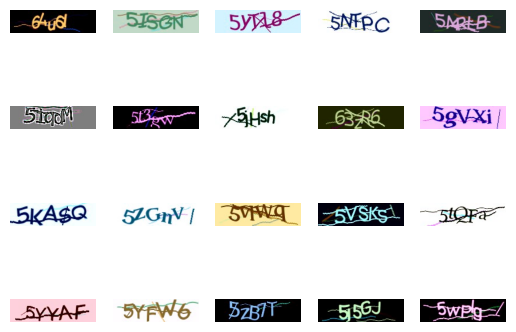

In [ ]:
for i,img in enumerate(images):
  plt.subplot(4,5,i+1)
  plt.imshow(img)
  plt.axis("off")
plt.show()

The shape of images are (40,150,3)

In [ ]:
images[1].shape

(40, 150, 3)

In [ ]:
labels = os.listdir(data_dir)

In [ ]:
len(labels)

10799

In [ ]:
print(labels)

['64u6l.jpg', '5isGn.jpg', '5yTl8.jpg', '5nTpc.jpg', '5mrLb.jpg', '5iqdM.jpg', '5t3gw.jpg', '5jHsh.jpg', '63zR6.jpg', '5gVXi.jpg', '5kASq.jpg', '5zGnV.jpg', '5vlWq.jpg', '5vSKs.jpg', '5tQFa.jpg', '5yYAF.jpg', '5yFw6.jpg', '5zB7T.jpg', '5j5GJ.jpg', '5wPIg.jpg', '5mW3h.jpg', '5jTa9.jpg', '5i5Md.jpg', '5rMfV.jpg', '5inu7.jpg', '5kGWz.jpg', '5xvLE.jpg', '5y6sD.jpg', '5gR6W.jpg', '5uCsB.jpg', '5wtXy.jpg', '6CuHt.jpg', '6FbSg.jpg', '6Rslw.jpg', '6HUQC.jpg', '6GrD3.jpg', '6Icte.jpg', '68W4O.jpg', '6Gy2x.jpg', '6PsSD.jpg', '6QUNH.jpg', '6FyqY.jpg', '6BwVF.jpg', '6ExPX.jpg', '6CP4F.jpg', '6Ewj7.jpg', '6Oj3O.jpg', '6L9Yc.jpg', '6CZaQ.jpg', '6KYMS.jpg', '6ALO4.jpg', '6AwDO.jpg', '6HiKF.jpg', '6Bi9m.jpg', '6AQrO.jpg', '6OIAs.jpg', '6GPSX.jpg', '65bfS.jpg', '6R72s.jpg', '6FexL.jpg', '6Pa8g.jpg', '6CvLl.jpg', '6QxhY.jpg', '6DxSO.jpg', '6EmWG.jpg', '6AqHK.jpg', '6ErRc.jpg', '65uEU.jpg', '6PuIQ.jpg', '6JBbP.jpg', '68Ijn.jpg', '67dcp.jpg', '6KkCd.jpg', '66AXY.jpg', '6APnE.jpg', '6HKFe.jpg', '6SJ9v.jpg'

In [ ]:
from collections import Counter
counter = Counter(labels)
unique_count = counter.most_common(1)[0][1]
duplicate_count = len(labels) - unique_count
print(f"unique items count is {unique_count}")
print(f"duplicate items count is {duplicate_count}")

unique items count is 1
duplicate items count is 10798


In [ ]:
# import shutil
# output_folder = "/content/drive/MyDrive/ML_CodeFest"
# train_output = os.path.join(output_folder, "train")
# val_output = os.path.join(output_folder, "val")
# test_output = os.path.join(output_folder, "test")
# os.makedirs(train_output, exist_ok=True)
# os.makedirs(val_output, exist_ok=True)
# os.makedirs(test_output, exist_ok=True)

# for image_file in data_train:
#     shutil.copy(image_file, train_output)

# for image_file in val_file:
#     shutil.copy(image_file, val_output)

# for image_file in data_test:
#     shutil.copy(image_file, test_output)